In [1]:
import sys
sys.path.append('../')

import numpy as np

from helper import *

In [7]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 500
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(100, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), max_epochs=10000, initial_lr=0.001, eps=loss_real+(loss_real), apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
    
    return results

In [36]:
results = research_minibatch_calculation(n_tests=100)

100%|██████████| 401/401 [03:27<00:00,  1.93it/s]


In [20]:
print(results)

[22.6, 22.3, 22.2, 21.9, 21.8, 21.6, 21.4, 21.0, 20.9, 21.1, 20.5, 20.3, 20.1, 20.0, 19.8, 19.9, 19.6, 19.3, 19.3, 19.0, 18.8, 18.9, 18.4, 18.8, 18.3, 18.0, 18.0, 17.9, 17.6, 18.0, 17.5, 17.3, 17.2, 17.1, 17.0, 17.0, 17.0, 16.7, 16.5, 16.6, 16.2, 16.1, 16.0, 16.0, 16.0, 15.9, 15.7, 15.8, 15.3, 15.8, 15.1, 15.2, 15.1, 15.0, 15.0, 15.0, 15.0, 14.7, 14.9, 14.3, 14.2, 14.2, 14.0, 14.0, 14.1, 14.0, 14.0, 14.0, 14.0, 14.0, 13.8, 13.6, 13.2, 13.3, 13.2, 13.3, 13.0, 13.1, 13.0, 13.1, 13.0, 13.0, 13.0, 13.0, 12.9, 12.7, 12.6, 12.3, 12.3, 12.1, 12.1, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.6, 11.6, 11.7, 11.4, 11.3, 11.0, 11.1, 11.1, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.9, 10.9, 10.6, 10.5, 10.7, 10.4, 10.3, 10.1, 10.1, 10.2, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.9, 9.9, 9.8, 9.8, 9.6, 9.7, 9.7, 9.4, 9.0, 9.1, 9.2, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.

In [39]:
def research_minibatch_view(results):

    # График n_epochs
    X = np.linspace(100, len(results) + 100, len(results))
    plt.plot(X, results, marker='o', linewidth=3, markersize=3, label='Minibatch GD')
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    plt.show()

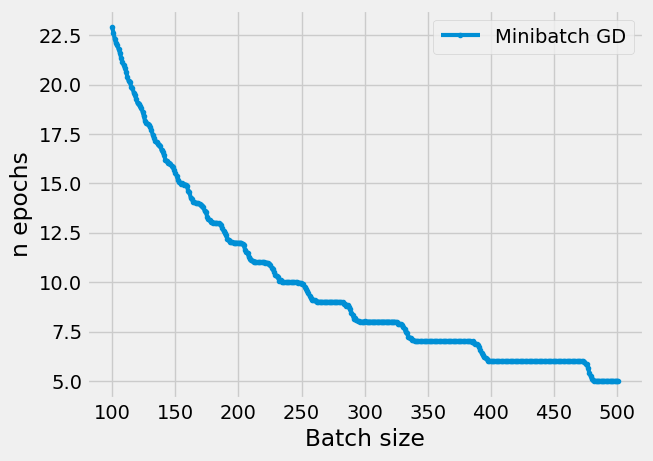

In [38]:
research_minibatch_view(results)